In [1]:
#Importing libraries
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import pandas as pd
from numpy import asarray


import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
 

In [2]:
%store -r
stored_variables = dir()
dataframe_names = [var for var in stored_variables if isinstance(eval(var), pd.DataFrame)]
print(dataframe_names)

['ARIMA_static', 'ARIMA_walk_forward', 'DecisionTree_roll', 'DecisionTree_static', 'DecisionTree_wf', 'Prophet_static', 'Prophet_wf', 'RandomForest_roll', 'RandomForest_static', 'RandomForest_wf', 'XGB_roll', 'XGB_static', 'XGB_wf', 'df_cleaned', 'series_lines_by_character_df', 'series_lines_clean_df', 'series_lines_raw_df']


### NOTE: THE FOLLOWING ARE ONLY METRICS FOR category A1 & A2 -  geschreddert in cluster [25, 24]

In [3]:
ARIMA_static

,mae,me,rmse,direction_accuracy
0,15.497086,14.843453,17.982535,0.5


In [4]:
ARIMA_walk_forward

,mae,me,rmse,direction_accuracy
0,8.888828,-0.133571,9.651584,0.375


In [5]:
DecisionTree_static

,mae,me,rmse,direction_accuracy
0,10.617329,6.974694,11.533878,0.25


In [6]:
DecisionTree_roll

,mae,me,rmse,direction_accuracy
0,7.148119,3.527439,9.056628,0.375


In [7]:
DecisionTree_wf

,mae,me,rmse,direction_accuracy
0,7.835223,1.155846,9.811467,0.6


In [8]:
RandomForest_static

,mae,me,rmse,direction_accuracy
0,9.543498,6.935595,10.814334,0.375


In [9]:
RandomForest_roll

,mae,me,rmse,direction_accuracy
0,6.893966,2.345931,8.555033,0.375


In [10]:
RandomForest_wf

,mae,me,rmse,direction_accuracy
0,7.234147,2.525658,8.732761,0.5


In [11]:
XGB_static

,mae,me,rmse,direction_accuracy
0,10.741105,7.736472,12.012174,0.375


In [12]:
XGB_roll

,mae,me,rmse,direction_accuracy
0,6.623338,1.548795,7.974943,0.5


In [13]:
XGB_wf

,mae,me,rmse,direction_accuracy
0,6.92263,2.32837,8.226339,0.5


In [14]:
Prophet_static

,mae,me,rmse,direction_accuracy
0,8.468395,-8.00553,10.4144,0.5


In [15]:
Prophet_wf

,mae,me,rmse,direction_accuracy
0,6.264178,-4.487235,7.939459,0.5


In [16]:
# Add a new column to each dataframe to store the dataframe name
ARIMA_static['Model'] = 'ARIMA_static'
ARIMA_walk_forward['Model'] = 'ARIMA_walk_forward'
DecisionTree_static['Model'] = 'DecisionTree_static'
DecisionTree_roll['Model'] = 'DecisionTree_roll'
DecisionTree_wf['Model'] = 'DecisionTree_wf'
RandomForest_static['Model'] = 'RandomForest_static'
RandomForest_roll['Model'] = 'RandomForest_roll'
RandomForest_wf['Model'] = 'RandomForest_wf'
XGB_static['Model'] = 'XGB_static'
XGB_roll['Model'] = 'XGB_roll'
XGB_wf['Model'] = 'XGB_wf'
Prophet_static['Model'] = 'Prophet_static'
Prophet_wf['Model'] = 'Prophet_wf'

# Concatenate the dataframes vertically
combined_df = pd.concat([ARIMA_static, ARIMA_walk_forward, DecisionTree_static, DecisionTree_roll, DecisionTree_wf, 
                         RandomForest_static, RandomForest_roll, RandomForest_wf, XGB_static, XGB_roll, XGB_wf, 
                         Prophet_static, Prophet_wf])

# Display the combined dataframe
print(combined_df)

         mae         me       rmse  direction_accuracy                Model
0  15.497086  14.843453  17.982535               0.500         ARIMA_static
0   8.888828  -0.133571   9.651584               0.375   ARIMA_walk_forward
0  10.617329   6.974694  11.533878               0.250  DecisionTree_static
0   7.148119   3.527439   9.056628               0.375    DecisionTree_roll
0   7.835223   1.155846   9.811467               0.600      DecisionTree_wf
0   9.543498   6.935595  10.814334               0.375  RandomForest_static
0   6.893966   2.345931   8.555033               0.375    RandomForest_roll
0   7.234147   2.525658   8.732761               0.500      RandomForest_wf
0  10.741105   7.736472  12.012174               0.375           XGB_static
0   6.623338   1.548795   7.974943               0.500             XGB_roll
0   6.922630   2.328370   8.226339               0.500               XGB_wf
0   8.468395  -8.005530  10.414400               0.500       Prophet_static
0   6.264178

In [17]:
combined_df.sort_values(by='rmse')

,mae,me,rmse,direction_accuracy,Model
0,6.264178,-4.487235,7.939459,0.500,Prophet_wf
0,6.623338,1.548795,7.974943,0.500,XGB_roll
0,6.922630,2.328370,8.226339,0.500,XGB_wf
0,6.893966,2.345931,8.555033,0.375,RandomForest_roll
0,7.234147,2.525658,8.732761,0.500,RandomForest_wf
0,7.148119,3.527439,9.056628,0.375,DecisionTree_roll
0,8.888828,-0.133571,9.651584,0.375,ARIMA_walk_forward
0,7.835223,1.155846,9.811467,0.600,DecisionTree_wf
0,8.468395,-8.005530,10.414400,0.500,Prophet_static
0,9.543498,6.935595,10.814334,0.375,RandomForest_static


In [18]:
combined_df.sort_values(by='direction_accuracy',ascending=False)

,mae,me,rmse,direction_accuracy,Model
0,7.835223,1.155846,9.811467,0.600,DecisionTree_wf
0,15.497086,14.843453,17.982535,0.500,ARIMA_static
0,7.234147,2.525658,8.732761,0.500,RandomForest_wf
0,6.623338,1.548795,7.974943,0.500,XGB_roll
0,6.922630,2.328370,8.226339,0.500,XGB_wf
0,8.468395,-8.005530,10.414400,0.500,Prophet_static
0,6.264178,-4.487235,7.939459,0.500,Prophet_wf
0,8.888828,-0.133571,9.651584,0.375,ARIMA_walk_forward
0,7.148119,3.527439,9.056628,0.375,DecisionTree_roll
0,9.543498,6.935595,10.814334,0.375,RandomForest_static


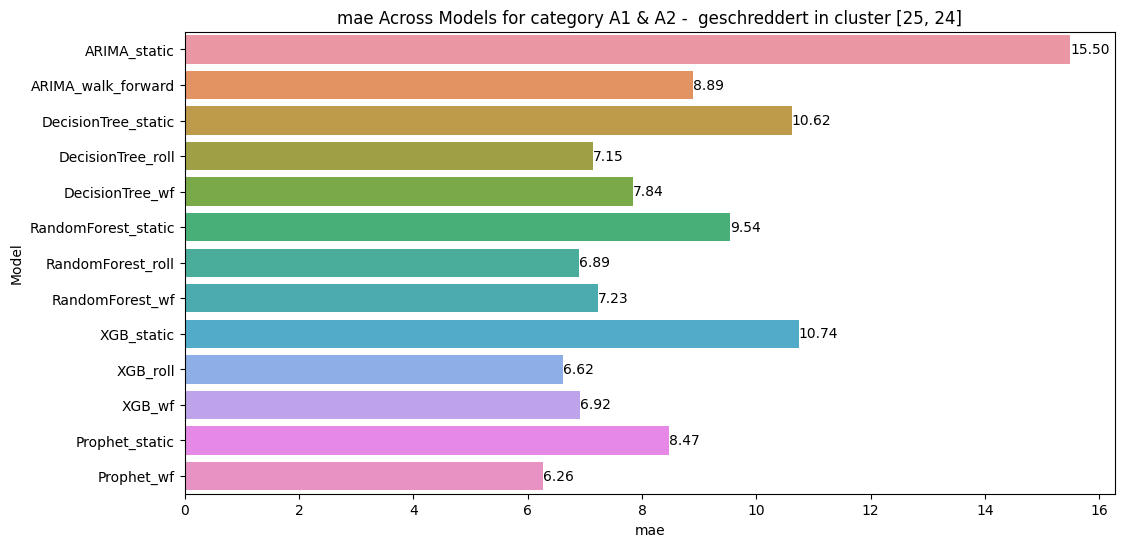

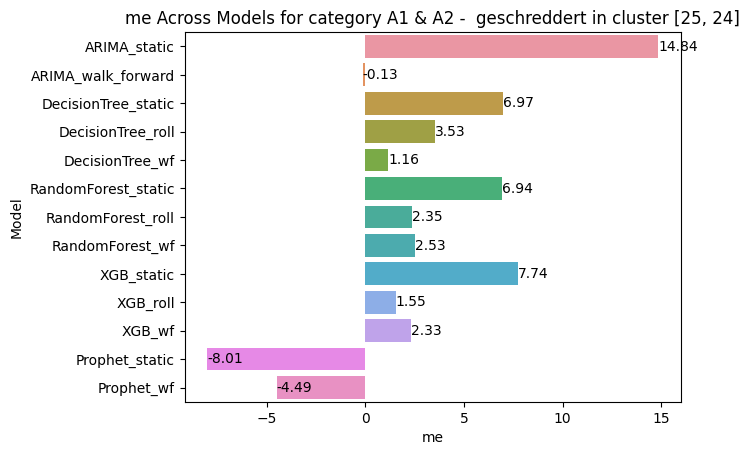

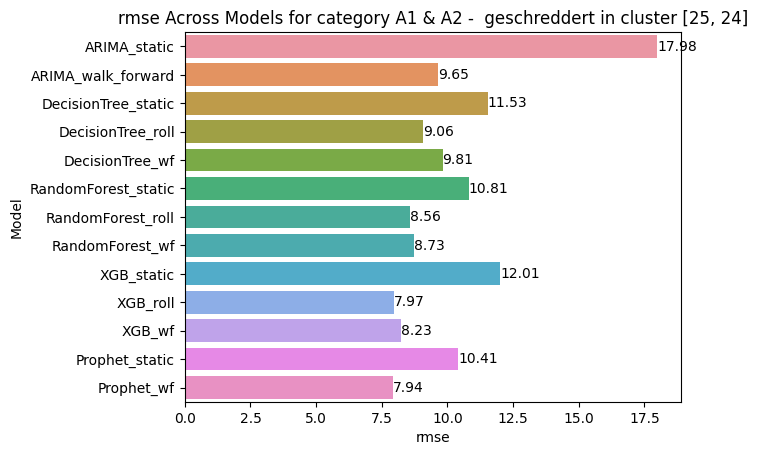

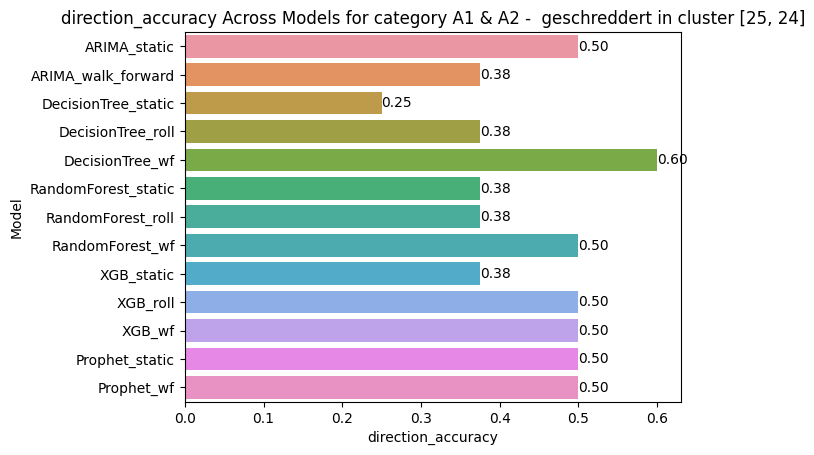

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(12, 6))

# Loop through each metric
for metric in ['mae', 'me', 'rmse', 'direction_accuracy']:
    # Plot the metric for each model
    sns.barplot(data=combined_df, x=metric, y='Model')

    # Add text labels next to the bars
    for index, value in enumerate(combined_df[metric]):
        plt.text(value, index, f'{value:.2f}', va='center')  # Add text with 2 decimal places

    plt.title(f'{metric} Across Models for category A1 & A2 -  geschreddert in cluster [25, 24]')
    plt.xlabel(metric)
    plt.ylabel('Model')
    plt.show()  # Show each plot separately

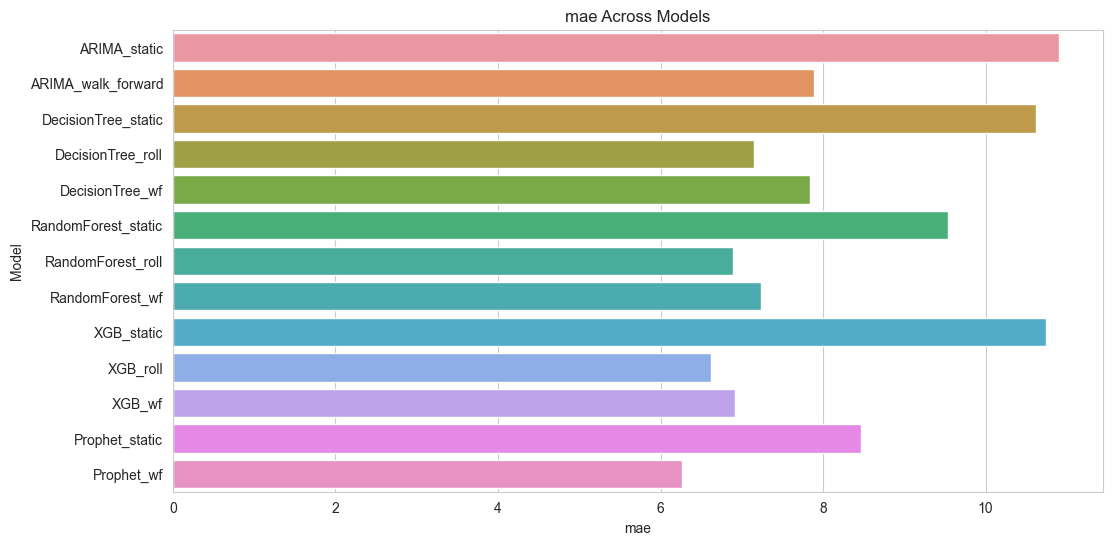

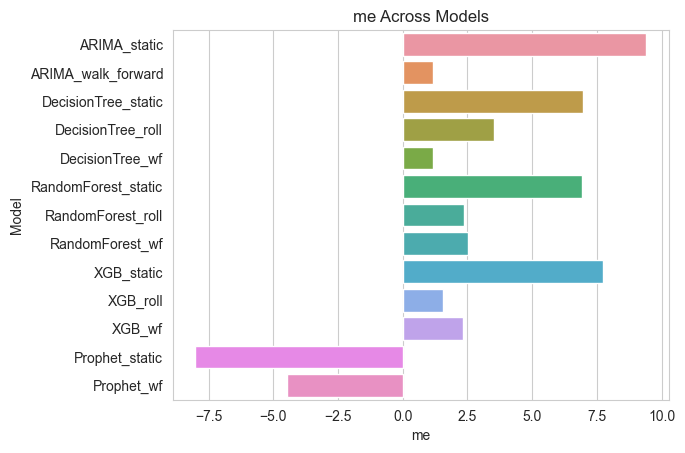

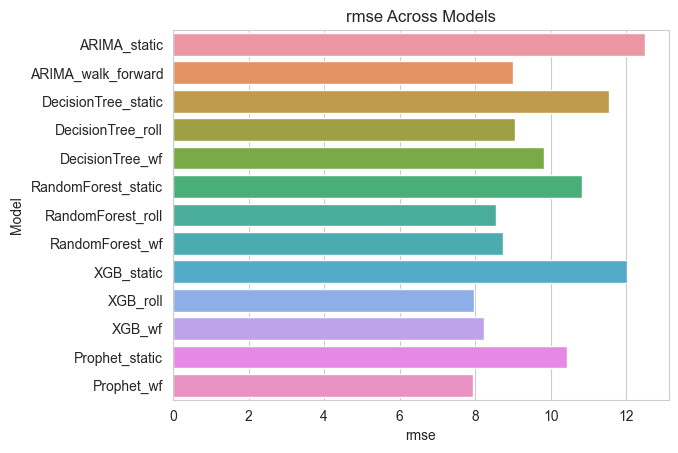

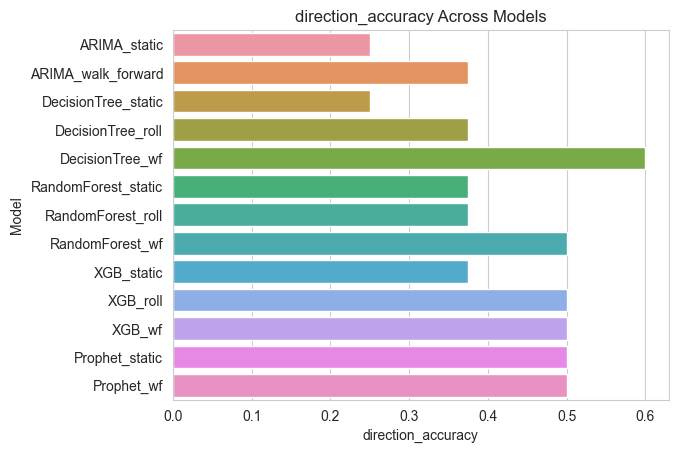

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style
sns.set_style("whitegrid")

# Plot
plt.figure(figsize=(12, 6))

# Loop through each metric
for metric in ['mae', 'me', 'rmse', 'direction_accuracy']:
    # Plot the metric for each model
    sns.barplot(data=combined_df, x=metric, y='Model')
    plt.title(f'{metric} Across Models for category A1 & A2 -  geschreddert in cluster [25, 24]')
    plt.xlabel(metric)
    plt.ylabel('Model')
    # plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()  # Show each plot separately


